# AGH - Deep Learning in Medical Image Analysis I

Author: Marek Wodziński

Contact: wodzinski@agh.edu.pl

You are allowed to use these materials for all purposes as long as the credit is given.


# Laboratory 4 - Neural Netoworks Training - Supervised

The goal of the Laboratory 4 is to:
<ul>
  <li> Familarize yourself with the gradient descent algorithm.
  <li> Get familiar with the neural network training process.
  <li> Train a neural network for the classification of brain tumors in the MRI images.
  <li> Understand the training hyperparameters: batch size, number of epochs, learning rate.
</ul>

You are going to: (i) implement the gradient descent algorithm in PyTorch, (ii) implement a simple convolutional network architecture, (iii) train the neural network using the supervised strategy (for image classification).

### Part I - Gradient Descent

The first part of the laboratory is not directly connected with the neural network training process but it is useful to understand the general concept.

You will start by implementing a simple version of the gradient descent algorithm. You can build the intuition by reading: 

http://mlwiki.org/index.php/Gradient_Descent

The gradient algorithm is the predecessor of the state-of-the-art optimization methods used to train the deep neural network like SGD or Adam - the methods you will use in the next parts of the laboratory. It is a first order gradient-based optimization method.

Let's start by generating a simple function. Your task will be to find the minimum of the function by the gradient descent (using PyTorch).

In [1]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt

# Let f(x, y) = x**2 + y**2
# Let's minimize the function analytically
# Gf(x) = [df(x, y) / dx, df(x, y) / dy] = [2*x, 2*y]
# 2*x = 0
# 2*y = 0
# The minimum is clearly defined (x, y) = (0, 0)
# Now verify this by the gradient descent

In [2]:
# Implement the gradient descent here
def grad(f, x, step):
  g = x.clone()
  for i, _ in enumerate(x):
    xc = x.clone()
    xc[i] += step
    g[i] = (f(*xc) - f(*x))/step
  return g

def gradient_descent(f, initial_guess, num_iters, learning_rate, echo=False):
  """
  f - function (callable) : function taking N variables as input
  num_iters - int : number of iterations
  initial_guess - Tensor : vector of N variables
  learning_rate - float: the learning rate for the gradient descent update
  echo - bool: whether to print the results during each iteration
  Note: Implement the gradient calculation on your own
  """
  result = initial_guess # TODO - intialize the result
  step = 0.001 # Some inner step inside the function to calculate the gradient
  for i in range(num_iters):
    gradient = grad(f, result, step) # TODO - calculate the numerical gradient for each iteration
    result = result - learning_rate * gradient # TODO - update the arguments using the gradient descent equation
    if echo:
      print(f"Current result: {result}, Value of the function at the current result: {f(*result)}")
  return result

Now let's verify the implementation:

In [3]:
f = lambda x, y: x**2 + y**2
initial_guess = tc.randn(2).type(tc.float32) # Let's start with some two random numbers
num_iters = 50
learning_rate = 0.1
echo = False

result = gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
print(f"Initial arguments: {initial_guess}, Value of the function for the initial arguments: {f(*initial_guess)}")
print(f"Result: {result}, Value of the function at the result: {f(*result)}")

Initial arguments: tensor([ 0.1482, -0.0840]), Value of the function for the initial arguments: 0.029012242332100868
Result: tensor([-0.0005, -0.0005]), Value of the function at the result: 4.990765773982275e-07


You can observe that the function became a bit unstable during the last iterations. This is connected with the learning rate: (i) if the learning rate is too high the function can become unstable, (ii) if the learning rate is too low the time required for optimization will be longer.

Verify the effect of the learning rate:

In [4]:
initial_guess = tc.randn(2).type(tc.float32) # Let's start with some two random numbers
num_iters = 50
learning_rate_low = 0.01
learning_rate_medium = 0.1
learning_rate_high =  10
echo = False

print()
result_lr_low = gradient_descent(f, initial_guess, num_iters, learning_rate_low, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_low)}")

print()
result_lr_medium = gradient_descent(f, initial_guess, num_iters, learning_rate_medium, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_medium)}")

print()
result_lr_high = gradient_descent(f, initial_guess, num_iters, learning_rate_high, echo)
print()
print(f"Result: {result}, Value of the function at the result: {f(*result_lr_high)}")



Result: tensor([-0.0005, -0.0005]), Value of the function at the result: 0.5136600136756897


Result: tensor([-0.0005, -0.0005]), Value of the function at the result: 5.279753167997114e-07


Result: tensor([-0.0005, -0.0005]), Value of the function at the result: 94224613376.0


You can observe that for the low learning rate the function requires more iterations to converge, the medium learning rate is more or less acceptable, while the high learning rate led to an unstability during the training process.

Next, let's implement the gradient descent again, however, this time use the PyTorch Autograd to calculate the gradient.

You may find useful to first read:

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

In [5]:
# Implement the gradient descent here
def gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo=False):
  """
  f - function (callable) :of N variables
  num_iters - int : number of iterations
  initial_guess - Tensor : vector of N variables
  learning_rate - float: the learning rate for gradient descent update
  echo - bool: whether to print the results during each iteration
  Note: Implement the gradient calculation using PyTorch Autograd
  """
  result = initial_guess
  for i in range(num_iters):
    F = f(*result)
    F.backward()
    gradient = result.grad
    
    # result variable stores the subtract operation but without gradient
    # because autograd remembers the operations in coputation graph
    result = result - learning_rate * gradient # update the arguments using the gradient descent equation
    # we need to detach it from the graph and add the requirement of grad
    result = result.detach().requires_grad_()
    if echo: # TODO - print the current result and the function value for this result
      print(f"Current result: {result}, Value of the function at the current result: {f(*result)}")
  return result

Verify the correctness. Moreover, compare the running time with the previously implemented function (with echo = False).

In [6]:
initial_guess = tc.randn(2, requires_grad=True).type(tc.float32)# Let's start with some two random numbers
num_iters = 50
learning_rate = 0.1
echo = False

result = gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
result_autograd = gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo)
print(f"Result Autograd: {result_autograd}, Value of the function at the result: {f(*result_autograd)}")
print(f"Initial arguments: {initial_guess}, Value of the function for the initial arguments: {f(*initial_guess)}")
print(f"Result: {result}, Value of the function at the result: {f(*result)}")

print()

%timeit gradient_descent(f, initial_guess, num_iters, learning_rate, echo)
%timeit gradient_descent_autograd(f, initial_guess, num_iters, learning_rate, echo)
# TODO - measure the execution time - note this is a toy problem and the autograd is calculated using GPU

Result Autograd: tensor([2.9386e-06, 2.9657e-06], requires_grad=True), Value of the function at the result: 1.7430175358601474e-11
Initial arguments: tensor([0.2059, 0.2078], requires_grad=True), Value of the function for the initial arguments: 0.08556634187698364
Result: tensor([-0.0005, -0.0005], grad_fn=<SubBackward0>), Value of the function at the result: 4.940991402690997e-07

17.1 ms ± 342 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.43 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


You can see that both the method work. However, the Autograd outputs more accurate results. The reason for this is connected with the fact that Autograd attempts to configure the gradient as accurately as possible (e.g. by choosing a dedicated gradient step). A speed-up compared with the naive gradient approximiation could be observed with more real-like problems (more variables) and using GPUs.

### Part II - Convolutional Neural Network

Let's now implement a simple neural network. Following the knowledge and skills you gained during Laboratory 2.

Implement a neural network with the following architecture:

<ul>
  <li> Conv2D with:
    <ul>
      <li> Input channels: 1
      <li> Output channels: 32
      <li> Kernel size: 3
      <li> Stride : 1
      <li> Padding: 1
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 32
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 2
      <li> Padding: 2
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 64
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 1
      <li> Padding: 1
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 64
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 2
      <li> Padding: 2
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 64
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 2
      <li> Padding: 2
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Conv2D with:
    <ul>
      <li> Input channels: 64
      <li> Output channels: 64
      <li> Kernel size: 3
      <li> Stride : 2
      <li> Padding: 1
    </ul>
  <li> BatchNorm2D
  <li> ReLU activation function
  <li> Adaptive Average Pooling to size (B, 128, 1, 1)
  <li> Linear layer with input size: 64, and output size: 64
  <li> ReLU activation function
  <li> Linear layer with input size: 64 and output size: 64
  <li> ReLU activation function
  <li> Linear layer with input size: 64 and output size: 4
</ul>

In [7]:
class ClassificationNetwork(tc.nn.Module):
    #TODO - implement the neural network architecture
    def __init__(self):
        super(ClassificationNetwork, self).__init__()
        # TODO
        self.sq = tc.nn.Sequential(
            # Convolution part
            tc.nn.Conv2d(1, 32, kernel_size=(3, 3), stride=1, padding=1),
            tc.nn.BatchNorm2d(32),
            tc.nn.ReLU(),
            
            tc.nn.Conv2d(32, 64, kernel_size=(3, 3), stride=2, padding=2),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU(),
            
            tc.nn.Conv2d(64, 64, kernel_size=(3, 3), stride=1, padding=1),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU(),
            
            tc.nn.Conv2d(64, 64, kernel_size=(3, 3), stride=2, padding=2),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU(),
            
            tc.nn.Conv2d(64, 64, kernel_size=(3, 3), stride=2, padding=2),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU(),
            
            tc.nn.Conv2d(64, 64, kernel_size=(3, 3), stride=2, padding=1),
            tc.nn.BatchNorm2d(64),
            tc.nn.ReLU(),
            
            tc.nn.AdaptiveAvgPool2d((1, 1)),
            tc.nn.Flatten(),
            
            # Dense / Linear part
            tc.nn.Linear(64, 64),
            tc.nn.ReLU(),
            
            tc.nn.Linear(64, 64),
            tc.nn.ReLU(),
            
            tc.nn.Linear(64, 4),
        )
        

    def forward(self, x):
        x = self.sq(x)
        return x

And generate random input to the verify whether the neural networks processes the input correctly:

In [8]:
from torchsummary import summary
device = tc.device("cuda") if tc.cuda.is_available() else tc.device("cpu")

classification_network = ClassificationNetwork()

batch_size = 4
random_input = tc.randn((batch_size, 1, 224, 224))
random_output = classification_network(random_input)

print(f"Size of the random input: {random_input.size()}")
print(f"Size of the random output: {random_output.size()}")
print("Random output: ")
print(random_output)

print("Network summary: ")
summary(classification_network.to(device), (1, 224, 224))

Size of the random input: torch.Size([4, 1, 224, 224])
Size of the random output: torch.Size([4, 4])
Random output: 
tensor([[-0.0464, -0.1592,  0.0733,  0.0022],
        [-0.0434, -0.1588,  0.0699,  0.0078],
        [-0.0483, -0.1621,  0.0730,  0.0068],
        [-0.0492, -0.1527,  0.0752,  0.0086]], grad_fn=<AddmmBackward0>)
Network summary: 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 64, 113, 113]          18,496
       BatchNorm2d-5         [-1, 64, 113, 113]             128
              ReLU-6         [-1, 64, 113, 113]               0
            Conv2d-7         [-1, 64, 113, 113]          36,928
       BatchNorm2d-8         [-1, 64, 113, 113]             128
             

### Part III - Dataset, Dataloader

You are going to use the dataset from the Laboratory 3 dedicated to tumor classification in the MRI images. Mount the google drives, create the pathes and copy-paste the dataloader (the extended version) to the cell below:

In [9]:
import os
import pandas as pd
!pip install SimpleITK
import SimpleITK as sitk
import torchvision as tv

# TODO - use the dataloader from the previous laboratory

Verify whether the data is being loaded correctly:

In [10]:
from PIL import Image
class BrainDataset(tc.utils.data.Dataset):
    def __init__(self, dataset_path, csv_path, transforms=None, z_norm=False):
        self.dataset_path = dataset_path
        self.csv_path = csv_path
        self.dataframe = pd.read_csv(self.csv_path, names=['element', 'class', 'name']) # - read the previously created csv
        self.dataframe = self.dataframe.loc[self.dataframe.index.dropna()]

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # - repeat the steps from the previous dataloader
        row = self.dataframe.iloc[idx]
                
        current_case = row[0]
        current_class = row[1]
        current_path = row[2]
        
        new_size = (224, 224)
        
        # print(os.path.join(self.dataset_path, current_path, current_case))
        current_image = np.array(
            Image.open(
                os.path.join(
                    self.dataset_path, current_path, current_case
                )
            ).resize(new_size)  # resize to (224x224)
            .convert('L')      # grayscale conversion
        ).astype(np.float32)
        
        # All images should have the same resolution
        # Resample the images to the same resolution (224x224), then convert the images to grayscale (if not already) and normalize to [0-1] values

        current_image *= (255.0/current_image.max())
        
        # To pytorch
        current_image = tc.from_numpy(current_image)
    
        # Unsqueeze for one channel to be returned (for input to the network)
        return current_image.unsqueeze(0), current_class
    

C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_case = row[0]
C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_class = row[1]
C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_path = row[2]


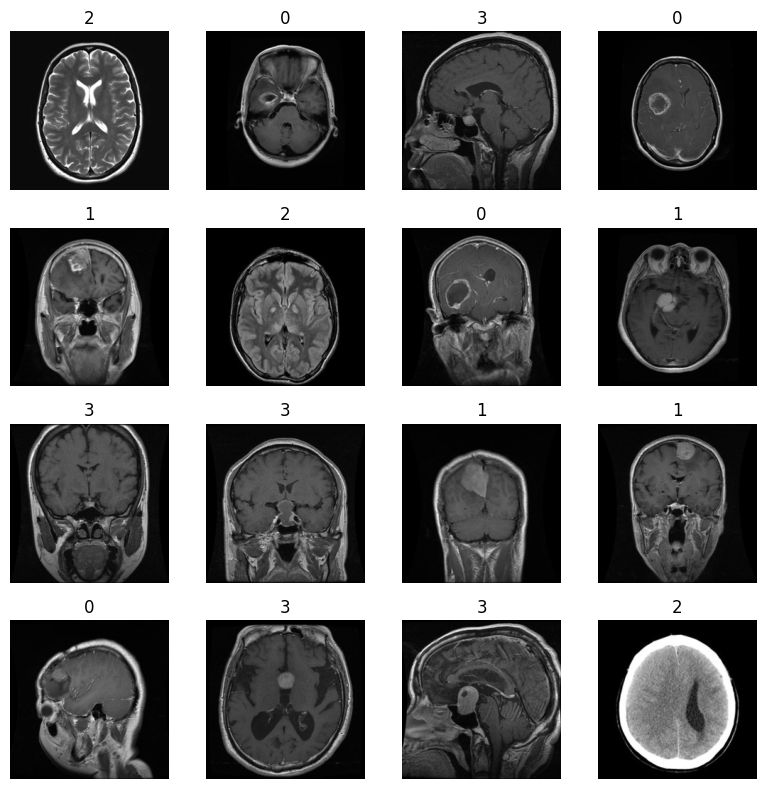

In [11]:
dataset_path = os.path.join("Brain_MRI")
training_csv_path = os.path.join(dataset_path, "training.csv")
testing_csv_path = os.path.join(dataset_path, "testing.csv")

batch_size = 16
shuffle = True
training_dataset = BrainDataset(os.path.join(dataset_path, "Training"), training_csv_path)
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

for images, classes in training_dataloader:
    # TODO - perform the same visualization as before but this time using the new version of the dataset
    fig, axs = plt.subplots(4, 4, figsize=(8, 8))
    for i, image in enumerate(images):
        row_id = i // 4
        col_id = i % 4
        axs[row_id][col_id].set_title(classes[i].item())
        axs[row_id][col_id].imshow(image[0], cmap='gray')
        axs[row_id][col_id].axis("off")
    fig.tight_layout()
    break

### Part IV - Network Training

Now it's the time to train the neural network. During this laboratory you are going to do this in a supervised manner. It means that the ground-truth labels will be provided during the training process to guide the network parameters into local minima of the objective function dedicated to image classification.

This time you will analyze the training process in a simplified way by accumulating and visualizing the process using matplotlib. More advanced TensorBoard logging will be the task during the next Laboratory.

Start with creating the training function. 

In [12]:
model = ClassificationNetwork()

In [13]:
list(model.parameters())[5]

Parameter containing:
tensor([-2.0595e-02, -1.5500e-02, -5.0925e-02, -4.7494e-02, -2.1213e-02,
         4.4098e-02,  2.5414e-03, -5.8864e-02,  4.7682e-02, -5.4934e-02,
        -4.6988e-02, -4.9048e-03, -2.0501e-02,  2.2294e-02, -1.8873e-02,
         2.6056e-02,  1.5926e-03, -3.0148e-02, -1.6016e-03, -1.2031e-02,
        -4.2574e-02,  2.8588e-02, -5.8271e-02, -1.7386e-02, -2.0282e-02,
         2.7679e-06,  4.4732e-03, -2.7473e-02,  5.4388e-02,  2.5241e-02,
        -1.0786e-03,  1.9701e-02,  4.2213e-02, -3.5510e-02,  3.0114e-02,
         9.2037e-03,  3.7636e-02, -2.4674e-02,  3.7271e-02, -4.6479e-02,
         1.2896e-02,  6.6382e-03,  5.2412e-02,  2.3408e-02,  4.5821e-02,
         3.7229e-02,  3.1322e-02, -3.5735e-02,  5.0577e-02,  2.2235e-02,
        -4.0008e-02,  1.1131e-02,  3.7897e-02, -2.4933e-02,  4.0553e-02,
        -8.6128e-03, -1.7274e-02, -4.9692e-02, -3.0076e-02,  2.9359e-02,
        -3.6814e-02, -2.4547e-02,  1.4719e-02, -1.1749e-03],
       requires_grad=True)

In [14]:
from tqdm import tqdm
def training(model, training_dataloader, testing_dataloader, training_params):
  num_epochs = training_params['num_epochs']
  learning_rate = training_params['learning_rate']

  objective_function = tc.nn.CrossEntropyLoss() # use the cross entropy loss (search for documentation)
  parameters = list(model.parameters()) # get the model parameters
  optimizer = tc.optim.AdamW(parameters, lr=learning_rate) # TODO: use the Adam optimizer for the model parameters and the defined learning rate
  
  # You want to use GPU (remember to set the correct run enviroment in the Google Colab settings)
  device = tc.device("cuda") if tc.cuda.is_available() else tc.device("cpu")

  training_losses = []
  testing_losses = [] # NOTE: in practical applications you should use validation set
  model = model.to(device) # Transfer the network to GPU
  
  print(f"Training dataset size: {len(training_dataloader.dataset)}")
  print(f"Testing dataset size: {len(testing_dataloader.dataset)}")
  for epoch in range(num_epochs):
    print(f"Current epoch: {epoch}")

    training_epoch_loss = 0.0
    model.train()
    for images, classes in tqdm(training_dataloader):
        images, classes = images.to(device), classes.to(device) # Transfer the images and classes to GPU
        output = model(images) # TODO: Forward the images through the model
        loss = objective_function(output, classes) # Calculate the objective function 
        
        loss.backward()  # compute the gradients
        optimizer.step()  # update the model parameters
        optimizer.zero_grad()  # clear the gradients
        training_epoch_loss += loss.item() * images.size(0)

    training_epoch_loss = training_epoch_loss / len(training_dataloader.dataset)
    training_losses.append(training_epoch_loss)
    print(f"Current epoch training loss: {training_epoch_loss}")

    testing_epoch_loss = 0.0
    model.eval()
    for images, classes in testing_dataloader:
      with tc.set_grad_enabled(False):
        images, classes = images.to(device), classes.to(device) # TODO: Transfer the images and classes to GPU
        output = model(images) # TODO: Forward the images through the model
        loss = objective_function(output, classes) # TODO: Calculate the objective function 
        # TODO: Update the epoch loss
        testing_epoch_loss += loss.item() * images.size(0)

    testing_epoch_loss = testing_epoch_loss / len(testing_dataloader.dataset)
    testing_losses.append(testing_epoch_loss)
    print(f"Current epoch testing loss: {testing_epoch_loss}")

  # Return the trained model and the history of training and testing losses
  return model, training_losses, testing_losses

Now define the training hyperparameters and create the training/testing dataloader (note: during this laboratory you not have the validation dataloader and the testing set is used as the validation dataloader, it will be modified during the next Laboratory):

In [15]:
learning_rate = 0.003
batch_size = 32
num_epochs = 100
shuffle = True
model = ClassificationNetwork()

training_params = {
    'learning_rate': learning_rate,
    'num_epochs': num_epochs,
}

training_dataset = BrainDataset(os.path.join(dataset_path, "Training"), training_csv_path)
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

testing_dataset = BrainDataset(os.path.join(dataset_path, "Testing"), testing_csv_path)
testing_dataloader = tc.utils.data.DataLoader(testing_dataset, batch_size=batch_size, shuffle=shuffle)

Run the training:

In [16]:
model, training_losses, testing_losses = training(model, training_dataloader, testing_dataloader, training_params)

Training dataset size: 2870
Testing dataset size: 394
Current epoch: 0


  0%|          | 0/90 [00:00<?, ?it/s]C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_case = row[0]
C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_class = row[1]
C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_path =

Current epoch training loss: 1.059924945806377
Current epoch testing loss: 1.7695976447332935
Current epoch: 1


100%|██████████| 90/90 [00:58<00:00,  1.55it/s]


Current epoch training loss: 0.8691269720057577
Current epoch testing loss: 2.095212760915611
Current epoch: 2


100%|██████████| 90/90 [01:00<00:00,  1.50it/s]


Current epoch training loss: 0.8079103701621397
Current epoch testing loss: 2.2395002926666723
Current epoch: 3


100%|██████████| 90/90 [00:59<00:00,  1.52it/s]


Current epoch training loss: 0.7271410709058782
Current epoch testing loss: 3.371203211963479
Current epoch: 4


100%|██████████| 90/90 [01:03<00:00,  1.43it/s]


Current epoch training loss: 0.6999589098870547
Current epoch testing loss: 2.7924779127091925
Current epoch: 5


100%|██████████| 90/90 [01:00<00:00,  1.48it/s]


Current epoch training loss: 0.642038242409869
Current epoch testing loss: 2.333054825739207
Current epoch: 6


100%|██████████| 90/90 [01:01<00:00,  1.46it/s]


Current epoch training loss: 0.6130329298017748
Current epoch testing loss: 2.2378922688779492
Current epoch: 7


100%|██████████| 90/90 [00:58<00:00,  1.53it/s]


Current epoch training loss: 0.5742203062419692
Current epoch testing loss: 2.0836246334356705
Current epoch: 8


100%|██████████| 90/90 [00:57<00:00,  1.57it/s]


Current epoch training loss: 0.5500094883533305
Current epoch testing loss: 4.85938522416323
Current epoch: 9


100%|██████████| 90/90 [00:58<00:00,  1.53it/s]


Current epoch training loss: 0.5334647143136334
Current epoch testing loss: 2.1248066195376634
Current epoch: 10


100%|██████████| 90/90 [00:55<00:00,  1.63it/s]


Current epoch training loss: 0.5159623392159931
Current epoch testing loss: 2.738646192599069
Current epoch: 11


100%|██████████| 90/90 [00:57<00:00,  1.57it/s]


Current epoch training loss: 0.4807567547422668
Current epoch testing loss: 4.2348276043906425
Current epoch: 12


100%|██████████| 90/90 [00:56<00:00,  1.59it/s]


Current epoch training loss: 0.4862769063133811
Current epoch testing loss: 2.0987642162342364
Current epoch: 13


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.43358334608194304
Current epoch testing loss: 3.5048747873548325
Current epoch: 14


100%|██████████| 90/90 [00:56<00:00,  1.58it/s]


Current epoch training loss: 0.4351760975575198
Current epoch testing loss: 2.3360156298893964
Current epoch: 15


100%|██████████| 90/90 [00:58<00:00,  1.54it/s]


Current epoch training loss: 0.4279851289991718
Current epoch testing loss: 3.2715574642123304
Current epoch: 16


100%|██████████| 90/90 [00:58<00:00,  1.53it/s]


Current epoch training loss: 0.39355095300940274
Current epoch testing loss: 3.2873389696711817
Current epoch: 17


100%|██████████| 90/90 [00:55<00:00,  1.61it/s]


Current epoch training loss: 0.3978717295550303
Current epoch testing loss: 2.141218969664598
Current epoch: 18


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.39071503389587803
Current epoch testing loss: 2.557796581142445
Current epoch: 19


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.3723624186025679
Current epoch testing loss: 3.32395936026791
Current epoch: 20


100%|██████████| 90/90 [00:58<00:00,  1.54it/s]


Current epoch training loss: 0.3609329039419154
Current epoch testing loss: 2.7409979873502315
Current epoch: 21


100%|██████████| 90/90 [00:55<00:00,  1.63it/s]


Current epoch training loss: 0.35232608561316436
Current epoch testing loss: 3.839875456040281
Current epoch: 22


100%|██████████| 90/90 [00:58<00:00,  1.54it/s]


Current epoch training loss: 0.33555541936217287
Current epoch testing loss: 2.781364374354406
Current epoch: 23


100%|██████████| 90/90 [00:59<00:00,  1.52it/s]


Current epoch training loss: 0.3200577232168942
Current epoch testing loss: 3.236810882684543
Current epoch: 24


100%|██████████| 90/90 [01:02<00:00,  1.45it/s]


Current epoch training loss: 0.31723933928104225
Current epoch testing loss: 2.8581577606007533
Current epoch: 25


100%|██████████| 90/90 [00:59<00:00,  1.52it/s]


Current epoch training loss: 0.32360437784460777
Current epoch testing loss: 3.335361663460126
Current epoch: 26


100%|██████████| 90/90 [00:56<00:00,  1.58it/s]


Current epoch training loss: 0.2980382328457118
Current epoch testing loss: 2.1843554186942007
Current epoch: 27


100%|██████████| 90/90 [00:56<00:00,  1.61it/s]


Current epoch training loss: 0.26089784028430435
Current epoch testing loss: 3.5174007561001077
Current epoch: 28


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.26849978842386385
Current epoch testing loss: 2.9603846012638306
Current epoch: 29


100%|██████████| 90/90 [00:55<00:00,  1.63it/s]


Current epoch training loss: 0.25699466494940715
Current epoch testing loss: 2.143496503987288
Current epoch: 30


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.2596583799202683
Current epoch testing loss: 2.467458733447312
Current epoch: 31


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.22342386754547677
Current epoch testing loss: 3.2301359830168903
Current epoch: 32


100%|██████████| 90/90 [00:55<00:00,  1.61it/s]


Current epoch training loss: 0.23558974708933447
Current epoch testing loss: 2.233074849027062
Current epoch: 33


100%|██████████| 90/90 [00:57<00:00,  1.58it/s]


Current epoch training loss: 0.241264555387796
Current epoch testing loss: 2.4202421958071327
Current epoch: 34


100%|██████████| 90/90 [00:53<00:00,  1.67it/s]


Current epoch training loss: 0.1862448896265196
Current epoch testing loss: 4.029653278099099
Current epoch: 35


100%|██████████| 90/90 [00:54<00:00,  1.65it/s]


Current epoch training loss: 0.1914873053517699
Current epoch testing loss: 2.6161956048858954
Current epoch: 36


100%|██████████| 90/90 [00:55<00:00,  1.61it/s]


Current epoch training loss: 0.1877649459273973
Current epoch testing loss: 2.9114325712174933
Current epoch: 37


100%|██████████| 90/90 [00:55<00:00,  1.61it/s]


Current epoch training loss: 0.16707457856434146
Current epoch testing loss: 2.271702737977662
Current epoch: 38


100%|██████████| 90/90 [00:56<00:00,  1.58it/s]


Current epoch training loss: 0.1568789186397444
Current epoch testing loss: 2.940425889746187
Current epoch: 39


100%|██████████| 90/90 [00:56<00:00,  1.59it/s]


Current epoch training loss: 0.1463234559168799
Current epoch testing loss: 3.261142377320885
Current epoch: 40


100%|██████████| 90/90 [00:54<00:00,  1.66it/s]


Current epoch training loss: 0.1427333572288839
Current epoch testing loss: 3.2150257735082945
Current epoch: 41


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.1239624675454163
Current epoch testing loss: 2.8330343370207673
Current epoch: 42


100%|██████████| 90/90 [00:58<00:00,  1.55it/s]


Current epoch training loss: 0.10863189758012519
Current epoch testing loss: 3.058222436511577
Current epoch: 43


100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


Current epoch training loss: 0.1957578896956992
Current epoch testing loss: 4.127628384507852
Current epoch: 44


100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


Current epoch training loss: 0.09132167459157285
Current epoch testing loss: 3.1753194223200607
Current epoch: 45


100%|██████████| 90/90 [01:01<00:00,  1.47it/s]


Current epoch training loss: 0.10251581144132992
Current epoch testing loss: 2.225069695922929
Current epoch: 46


100%|██████████| 90/90 [01:01<00:00,  1.46it/s]


Current epoch training loss: 0.10449585362697728
Current epoch testing loss: 2.9770305967572983
Current epoch: 47


100%|██████████| 90/90 [00:57<00:00,  1.55it/s]


Current epoch training loss: 0.10480169133390284
Current epoch testing loss: 6.144823718192009
Current epoch: 48


100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


Current epoch training loss: 0.07808606414065959
Current epoch testing loss: 3.3388706717999455
Current epoch: 49


100%|██████████| 90/90 [01:00<00:00,  1.48it/s]


Current epoch training loss: 0.062021503958344874
Current epoch testing loss: 3.001890485056766
Current epoch: 50


100%|██████████| 90/90 [01:00<00:00,  1.49it/s]


Current epoch training loss: 0.0590024855390243
Current epoch testing loss: 2.774239437229137
Current epoch: 51


100%|██████████| 90/90 [00:57<00:00,  1.57it/s]


Current epoch training loss: 0.03148278726093659
Current epoch testing loss: 3.1319442945083384
Current epoch: 52


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.06563479202030428
Current epoch testing loss: 2.9432890463601513
Current epoch: 53


100%|██████████| 90/90 [00:58<00:00,  1.55it/s]


Current epoch training loss: 0.08344394686771395
Current epoch testing loss: 2.371037730105637
Current epoch: 54


100%|██████████| 90/90 [01:03<00:00,  1.41it/s]


Current epoch training loss: 0.10601111644236469
Current epoch testing loss: 3.921972305036438
Current epoch: 55


100%|██████████| 90/90 [00:55<00:00,  1.61it/s]


Current epoch training loss: 0.0779371218970013
Current epoch testing loss: 2.8832182533244795
Current epoch: 56


100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


Current epoch training loss: 0.03477716976809169
Current epoch testing loss: 3.6748974565322023
Current epoch: 57


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.043526735095362395
Current epoch testing loss: 3.3139173149457437
Current epoch: 58


100%|██████████| 90/90 [00:59<00:00,  1.52it/s]


Current epoch training loss: 0.04412660110670463
Current epoch testing loss: 3.3155434192134643
Current epoch: 59


100%|██████████| 90/90 [00:59<00:00,  1.50it/s]


Current epoch training loss: 0.040167253983664594
Current epoch testing loss: 6.6023144213681295
Current epoch: 60


100%|██████████| 90/90 [00:58<00:00,  1.54it/s]


Current epoch training loss: 0.0647018002832912
Current epoch testing loss: 3.471560998616485
Current epoch: 61


100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


Current epoch training loss: 0.07904874488503676
Current epoch testing loss: 2.3796946227853066
Current epoch: 62


100%|██████████| 90/90 [00:58<00:00,  1.54it/s]


Current epoch training loss: 0.04376913844396844
Current epoch testing loss: 4.061397487136918
Current epoch: 63


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.0264337087504384
Current epoch testing loss: 4.782602163740826
Current epoch: 64


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.016259912251193036
Current epoch testing loss: 3.8816015260473726
Current epoch: 65


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.040807395372280154
Current epoch testing loss: 4.133933017701667
Current epoch: 66


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.028578431080403748
Current epoch testing loss: 3.439814887978704
Current epoch: 67


100%|██████████| 90/90 [00:59<00:00,  1.50it/s]


Current epoch training loss: 0.13282193882124765
Current epoch testing loss: 3.4374727839745844
Current epoch: 68


100%|██████████| 90/90 [01:01<00:00,  1.46it/s]


Current epoch training loss: 0.045057842021204456
Current epoch testing loss: 4.43100933133043
Current epoch: 69


100%|██████████| 90/90 [00:58<00:00,  1.55it/s]


Current epoch training loss: 0.035077566854681705
Current epoch testing loss: 4.003156867729226
Current epoch: 70


100%|██████████| 90/90 [00:58<00:00,  1.54it/s]


Current epoch training loss: 0.016783125397914742
Current epoch testing loss: 3.2183376702711666
Current epoch: 71


100%|██████████| 90/90 [00:57<00:00,  1.55it/s]


Current epoch training loss: 0.047724929002344034
Current epoch testing loss: 3.110614734857821
Current epoch: 72


100%|██████████| 90/90 [00:59<00:00,  1.52it/s]


Current epoch training loss: 0.048088292104195324
Current epoch testing loss: 2.9595203762732183
Current epoch: 73


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.027014016995420647
Current epoch testing loss: 3.0611129847879943
Current epoch: 74


100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


Current epoch training loss: 0.05739198449337109
Current epoch testing loss: 3.766262064125332
Current epoch: 75


100%|██████████| 90/90 [00:59<00:00,  1.50it/s]


Current epoch training loss: 0.07650271977852861
Current epoch testing loss: 2.680012862694445
Current epoch: 76


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.012858416351979722
Current epoch testing loss: 2.7832480057847078
Current epoch: 77


100%|██████████| 90/90 [00:57<00:00,  1.58it/s]


Current epoch training loss: 0.004734632393624309
Current epoch testing loss: 3.6193186062846694
Current epoch: 78


100%|██████████| 90/90 [00:55<00:00,  1.63it/s]


Current epoch training loss: 0.004668837459595673
Current epoch testing loss: 3.4850786942515883
Current epoch: 79


100%|██████████| 90/90 [00:57<00:00,  1.58it/s]


Current epoch training loss: 0.004231229669070488
Current epoch testing loss: 3.486112616388931
Current epoch: 80


100%|██████████| 90/90 [00:56<00:00,  1.58it/s]


Current epoch training loss: 0.047484378860322335
Current epoch testing loss: 4.0915638638026826
Current epoch: 81


100%|██████████| 90/90 [00:59<00:00,  1.52it/s]


Current epoch training loss: 0.056665040792748075
Current epoch testing loss: 3.669358125192865
Current epoch: 82


100%|██████████| 90/90 [00:59<00:00,  1.51it/s]


Current epoch training loss: 0.04584038092621735
Current epoch testing loss: 3.141771553736653
Current epoch: 83


100%|██████████| 90/90 [00:58<00:00,  1.53it/s]


Current epoch training loss: 0.029862012874127368
Current epoch testing loss: 3.1252979736037667
Current epoch: 84


100%|██████████| 90/90 [00:55<00:00,  1.63it/s]


Current epoch training loss: 0.04719247525048406
Current epoch testing loss: 3.1905363102249686
Current epoch: 85


100%|██████████| 90/90 [00:55<00:00,  1.62it/s]


Current epoch training loss: 0.04330277622771492
Current epoch testing loss: 4.0789791381903715
Current epoch: 86


100%|██████████| 90/90 [00:57<00:00,  1.57it/s]


Current epoch training loss: 0.032962025568142324
Current epoch testing loss: 2.7347992604154014
Current epoch: 87


100%|██████████| 90/90 [00:55<00:00,  1.63it/s]


Current epoch training loss: 0.015030063736578612
Current epoch testing loss: 3.693853927747852
Current epoch: 88


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.00770503828084609
Current epoch testing loss: 3.2556524833446834
Current epoch: 89


100%|██████████| 90/90 [00:54<00:00,  1.64it/s]


Current epoch training loss: 0.011610457891288443
Current epoch testing loss: 2.6388036297057487
Current epoch: 90


100%|██████████| 90/90 [00:55<00:00,  1.63it/s]


Current epoch training loss: 0.015442516951000752
Current epoch testing loss: 4.7391899636554236
Current epoch: 91


100%|██████████| 90/90 [00:56<00:00,  1.60it/s]


Current epoch training loss: 0.08131761163512069
Current epoch testing loss: 3.5835578260082883
Current epoch: 92


100%|██████████| 90/90 [00:55<00:00,  1.61it/s]


Current epoch training loss: 0.04289620956925202
Current epoch testing loss: 3.35215397776686
Current epoch: 93


100%|██████████| 90/90 [00:57<00:00,  1.56it/s]


Current epoch training loss: 0.057458242203534064
Current epoch testing loss: 3.0079508493394416
Current epoch: 94


100%|██████████| 90/90 [00:54<00:00,  1.64it/s]


Current epoch training loss: 0.013580622317639377
Current epoch testing loss: 2.61769895686716
Current epoch: 95


100%|██████████| 90/90 [00:57<00:00,  1.58it/s]


Current epoch training loss: 0.017861022513509055
Current epoch testing loss: 4.14777705148997
Current epoch: 96


100%|██████████| 90/90 [00:54<00:00,  1.64it/s]


Current epoch training loss: 0.007687335278571564
Current epoch testing loss: 3.254792949269871
Current epoch: 97


100%|██████████| 90/90 [00:54<00:00,  1.64it/s]


Current epoch training loss: 0.006684740082983849
Current epoch testing loss: 3.553922459558787
Current epoch: 98


100%|██████████| 90/90 [00:54<00:00,  1.65it/s]


Current epoch training loss: 0.007627334139303333
Current epoch testing loss: 4.665227260686419
Current epoch: 99


100%|██████████| 90/90 [00:57<00:00,  1.57it/s]


Current epoch training loss: 0.02870393883297382
Current epoch testing loss: 3.232967595763618


In [18]:
tc.save(model, "model.pt")

And finally visualize the training/validation process by showing the loss during each epoch (as below):

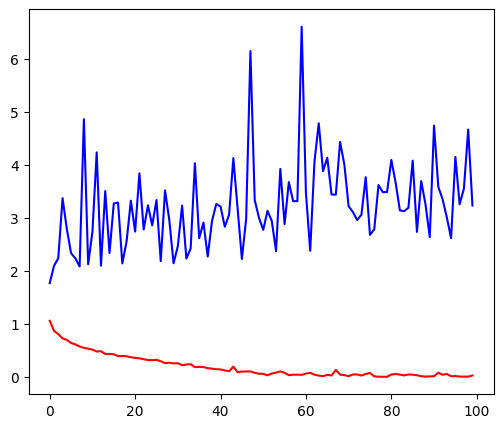

In [19]:
# TODO: Plot the visualization of the training process as below.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(training_losses, c='r')
ax.plot(testing_losses, c='b')

# During next laboratory you will use a better tool: TensorBoard

Do you see any problems? What went wrong? What whould happen after inreasing the number of training epochs?

You have just finished the training of the neural network. The next task is to analyze the obtained results.

### Part V - Result Analysis

In the last part of the Laboratory you are going to analyze the results. First, you are going to show the confusion matrices for the training and testing sets. Then, you will visualize the cases for which the network failed.

Start with creating function responsible for accumulating the results. The function should perform a single pass through a dataloader and accumulate all predicitions, together with the corresponding group truth labels.

In [20]:
def accumulate_predictions(model, dataloader):
  device = tc.device("cuda") if tc.cuda.is_available() else tc.device("cpu")
  predictions = tc.Tensor([]).to(device)
  targets = tc.Tensor([]).to(device)
  # device = "cuda:0"
  model.eval()
  with tc.set_grad_enabled(False):
      print(f"Dataset size: {len(dataloader.dataset)}")
      for images, classes in dataloader:
        images = images.to(device)
        classes = classes.to(device)
        predictions = tc.cat((predictions, tc.max(model(images), dim=1).indices))
        targets = tc.cat((targets, classes))
        # pass # TODO
  return predictions, targets

training_predictions, training_targets = accumulate_predictions(model, training_dataloader)
testing_predictions, testing_targets =  accumulate_predictions(model, testing_dataloader)


Dataset size: 2870


C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_case = row[0]
C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_class = row[1]
C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_path = row[2]


Dataset size: 394


Now use the function to accumulate the results for training/testing dataloaders and use **sklearn** to show the confusion matrices and classification summary.

Confusion matrix for training:
 [[821   3   0   2]
 [  2 792   0  28]
 [  0  12 383   0]
 [  0   0   0 827]]
              precision    recall  f1-score   support

      Glioma       1.00      0.99      1.00       826
  Meningioma       0.98      0.96      0.97       822
     Healthy       1.00      0.97      0.98       395
   Pituitary       0.96      1.00      0.98       827

    accuracy                           0.98      2870
   macro avg       0.99      0.98      0.98      2870
weighted avg       0.98      0.98      0.98      2870

Confusion matrix for training:
 [[ 19  35  37   9]
 [  0 109   2   4]
 [  0   5 100   0]
 [  0   4   9  61]]
              precision    recall  f1-score   support

      Glioma       1.00      0.19      0.32       100
  Meningioma       0.71      0.95      0.81       115
     Healthy       0.68      0.95      0.79       105
   Pituitary       0.82      0.82      0.82        74

    accuracy                           0.73       394
   macro avg       0.

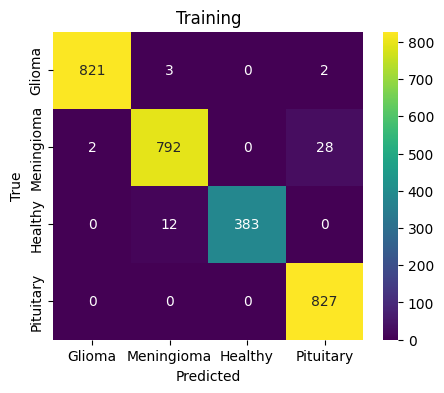

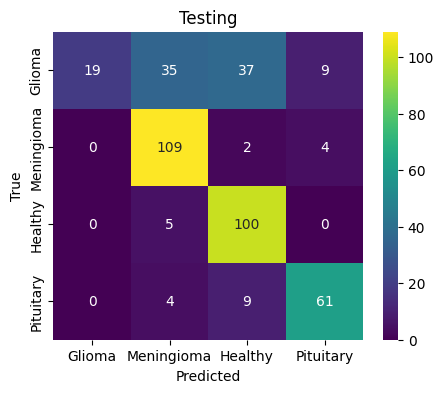

In [21]:
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

target_names = ["Glioma", "Meningioma", "Healthy", "Pituitary"]

training_targets = training_targets.to("cpu")
training_predictions = training_predictions.to("cpu")
testing_targets = testing_targets.to("cpu")
testing_predictions = testing_predictions.to("cpu")

# Compute confusion matrix
confm_train = metrics.confusion_matrix(training_targets, training_predictions)
confm_test = metrics.confusion_matrix(testing_targets, testing_predictions)

print("Confusion matrix for training:\n", confm_train)
print(metrics.classification_report(training_targets, training_predictions, target_names=target_names))

print("Confusion matrix for training:\n", confm_test)
print(metrics.classification_report(testing_targets, testing_predictions, target_names=target_names))


# Display the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confm_train, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap="viridis")
plt.title("Training")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(confm_test, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap="viridis")
plt.title("Testing")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

What went wrong? Why the results for the training set are so different from the testing set?

Finally, prepare the visualization similar to the one below but showing example of incorrectly classified cases. Show next to the given image the real class and the predicted one.

Answer: The loss is unreasonably high despite results being quite acceptable. We can see though, that often model predicts a class as Glioma despite it being different class. This may suggest high similarity to other classes.

C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_case = row[0]
C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_class = row[1]
C:\Users\juziu\AppData\Local\Temp\ipykernel_9408\4201383626.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_path = row[2]


tensor([1, 2, 2, 1, 1, 2, 1, 1, 3, 2, 1, 1, 0, 1, 1, 1, 3, 3, 1, 1, 2, 1, 0, 0,
        0, 2, 2, 1, 3, 0, 0, 0])


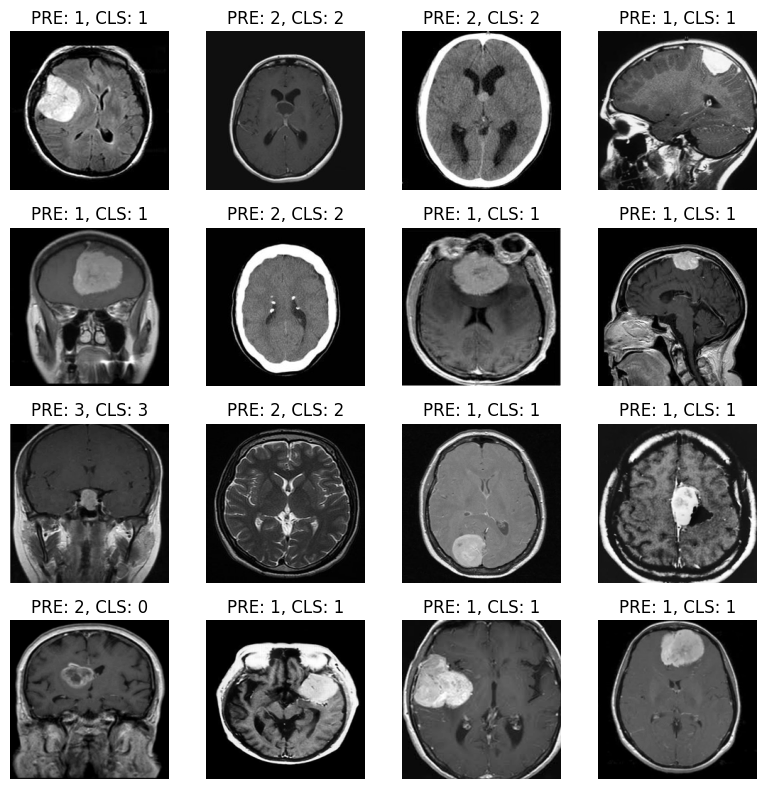

In [22]:
predictions = tc.Tensor([])

for images, classes in testing_dataloader:
    print(classes)
    # TODO - perform the same visualization as before but this time using the new version of the dataset
    fig, axs = plt.subplots(4, 4, figsize=(8, 8))
    predictions = tc.cat((predictions, tc.max(model(images.to(device)).to("cpu"), dim=1).indices))
    for i, image in enumerate(images):
        if i == 16:
            break
        row_id = i // 4
        col_id = i % 4
        # pred_class = model(image)
        axs[row_id][col_id].set_title(f"PRE: {int(predictions[i].to("cpu"))}, CLS: {classes[i].item()}")
        axs[row_id][col_id].imshow(image[0], cmap='gray')
        axs[row_id][col_id].axis("off")
    fig.tight_layout()
    break

What can you say about the results using the confusion matrices and the visualization? Is the classification working correctly? What's wrong? Do you have any idea how to improve the results? Hint: visually examine the images for each class, both in the training and the testing set.

We will continue the classification topic during the next laboratory using different dataset and a pretrained ResNet18 architecture.

Answer: Confusion matrices suggest high precision but low recall for first class - Glioma. This model is not perfect but practically speaking, we want to detect anomalies most of the time. In this case, we do not want to classify unhealthy person as healthy, hence giving up a precision over recall is beneficial. More often than not, this model has a way higher recall over precision except for Glioma. In order to improve there is more work needed: probably some image transformation for model to catch the differences between pictures better - they are very similar in a way of portraying a brain.

### Conclusion

Congratulations, you have implemented the gradient descent method, the supervised training pipeline and prepared the training setup for the medical image classification.

After the laboratory you should:
<ul>
  <li> Understand the intuition behind the gradient descent method.
  <li> Be able to implement your own training pipeline for the supervised learning.
  <li> Modify the training hyperparameters to verify their influence on the final results.
</ul>

During the next laboratory you are going to extend the knowledge for classification of XRay images by image augmentation, transfer learning from pretrained ResNet18 network, and logging using TensorBoard. You will also extend the evaluation beyond the confusion matrix and simple visualization.